# Welche Wörter werden in englischsprachigen Liedern am meisten Verwendet

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('lyrics_clean_utf8.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259793 entries, 0 to 259792
Data columns (total 7 columns):
Unnamed: 0                      259793 non-null int64
song                            259792 non-null object
year                            259793 non-null int64
genre                           259793 non-null object
word_tokenize_no_punctuation    259793 non-null object
word_tokenize_length            259793 non-null int64
word_tokenize_no_stopwords      259793 non-null object
dtypes: int64(3), object(4)
memory usage: 13.9+ MB


In [3]:
df.head()

,Unnamed: 0,song,year,genre,word_tokenize_no_punctuation,word_tokenize_length,word_tokenize_no_stopwords
0,0,ego-remix,2009,Pop,"['oh', 'baby', 'how', 'you', 'doing', 'you', '...",474,"['oh', 'baby', 'know', ""'m"", 'gon', 'na', 'cut..."
1,1,then-tell-me,2009,Pop,"['playin', 'everything', 'so', 'easy', 'it', ""...",270,"['playin', 'everything', 'easy', ""'s"", 'like',..."
2,2,honesty,2009,Pop,"['if', 'you', 'search', 'for', 'tenderness', '...",177,"['search', 'tenderness', ""n't"", 'hard', 'find'..."
3,3,you-are-my-rock,2009,Pop,"['oh', 'oh', 'oh', 'i', 'oh', 'oh', 'oh', 'i',...",555,"['oh', 'oh', 'oh', 'oh', 'oh', 'oh', 'verse', ..."
4,4,black-culture,2009,Pop,"['party', 'the', 'people', 'the', 'people', 't...",338,"['party', 'people', 'people', 'party', ""'s"", '..."


## Entfernen von Trennzeichen
Entfernen der CSV Trenzeichen ' und "

In [4]:
df['word_tokenize_no_punctuation'] = df['word_tokenize_no_punctuation'].str.replace("'",'')
df['word_tokenize_no_punctuation'] = df['word_tokenize_no_punctuation'].str.replace('"','')
df['word_tokenize_no_stopwords'] = df['word_tokenize_no_stopwords'].str.replace("'",'')
df['word_tokenize_no_stopwords'] = df['word_tokenize_no_stopwords'].str.replace('"','')
df.head()

,Unnamed: 0,song,year,genre,word_tokenize_no_punctuation,word_tokenize_length,word_tokenize_no_stopwords
0,0,ego-remix,2009,Pop,"[oh, baby, how, you, doing, you, know, i, m, g...",474,"[oh, baby, know, m, gon, na, cut, right, chase..."
1,1,then-tell-me,2009,Pop,"[playin, everything, so, easy, it, s, like, yo...",270,"[playin, everything, easy, s, like, seem, sure..."
2,2,honesty,2009,Pop,"[if, you, search, for, tenderness, it, is, nt,...",177,"[search, tenderness, nt, hard, find, love, nee..."
3,3,you-are-my-rock,2009,Pop,"[oh, oh, oh, i, oh, oh, oh, i, verse, 1, if, i...",555,"[oh, oh, oh, oh, oh, oh, verse, 1, wrote, book..."
4,4,black-culture,2009,Pop,"[party, the, people, the, people, the, party, ...",338,"[party, people, people, party, s, popping, sit..."


## Zählen der Wörter

### Mit Füllwörtern

In [5]:
s_frequency = pd.Series(' '.join(df['word_tokenize_no_punctuation']).lower().split()).value_counts()
s_frequency.head(10)

i,      2550384
the,    2198526
you,    2090279
to,     1268560
and,    1249524
a,      1136374
it,      973567
me,      911659
s,       778258
my,      771430
dtype: int64

### Ohne Füllwörter

In [6]:
s_frequency_no_stopwords = pd.Series(' '.join(df['word_tokenize_no_stopwords']).lower().split()).value_counts()
s_frequency_no_stopwords.head(20)

s,        760823
nt,       729995
m,        459595
love,     316000
like,     309896
know,     306828
got,      272983
re,       254845
ll,       233967
na,       221960
get,      217873
oh,       216699
one,      184855
go,       182040
time,     180738
see,      178305
never,    173510
let,      168333
ve,       165304
want,     155084
dtype: int64

Entfernen der durch die Tokenization entstandenen Fehlerhaften Wörter

In [7]:
s_frequency_no_stopwords=s_frequency_no_stopwords.drop(s_frequency_no_stopwords.index[[0,1,2,7,9]])
s_frequency_no_stopwords.head(10)

love,    316000
like,    309896
know,    306828
got,     272983
ll,      233967
get,     217873
oh,      216699
one,     184855
go,      182040
time,    180738
dtype: int64

## Ausgabe der Ergebnisse

### Mit Stopwörtern

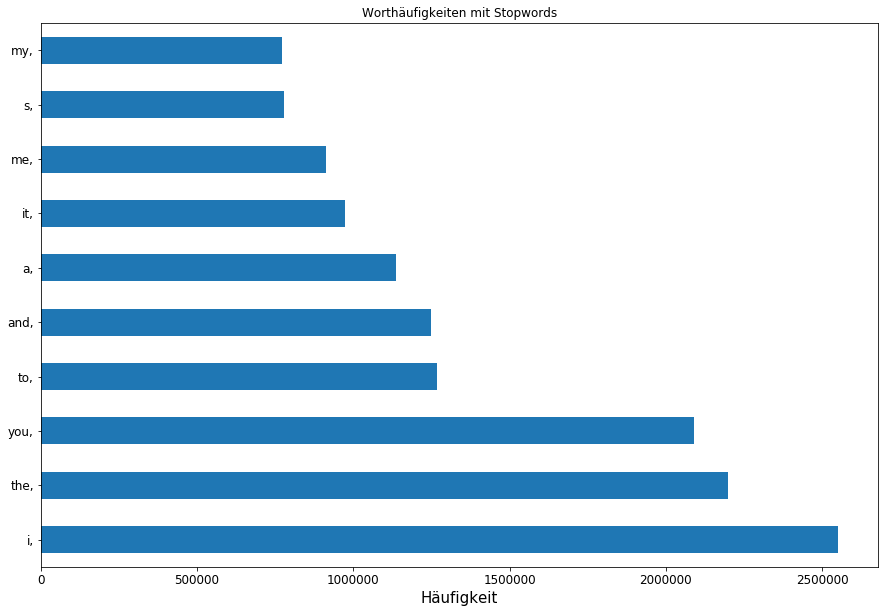

In [8]:
import matplotlib.pyplot as plt

plot_tokenize = s_frequency[:10].plot(kind='barh', title ="Worthäufigkeiten mit Stopwords", figsize=(15, 10), fontsize=12)
plot_tokenize.set_xlabel("Häufigkeit", fontsize=15)
#plot_tokenize.set_ylabel("Auftauchen", fontsize=15)
plt.show()

### Ohne Stopwörtern

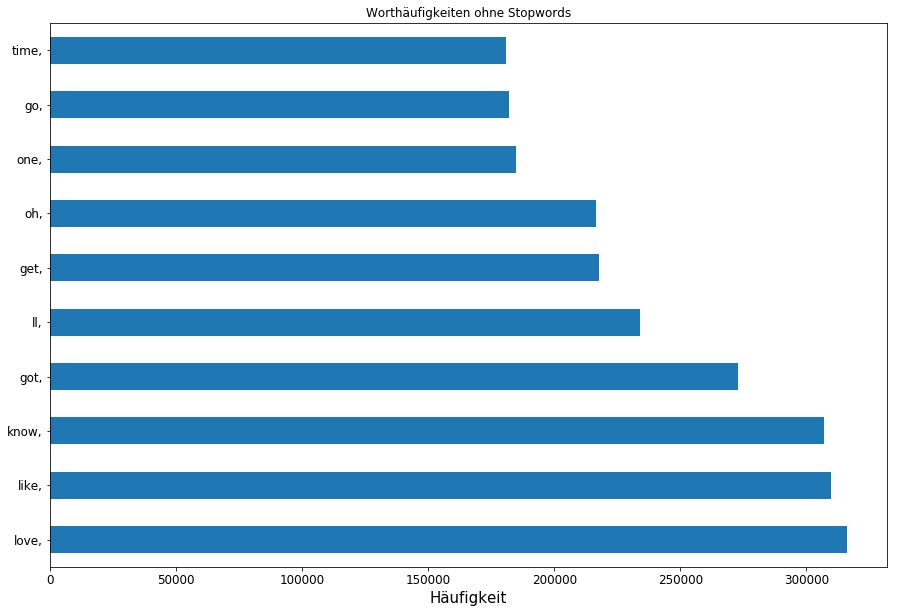

In [10]:
plot_stopwords = s_frequency_no_stopwords[:10].plot(kind='barh', title ="Worthäufigkeiten ohne Stopwords",figsize=(15, 10), fontsize=12)
plot_stopwords.set_xlabel("Häufigkeit", fontsize=15)
#plot_stopwords.set_ylabel("Auftauchen", fontsize=15)
plt.show()